<a href="https://colab.research.google.com/github/yesoly/MachineLearningProject/blob/master/Assignment_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [2]:
# import data with numpy
path = '/assignment_02_profit_population.txt'
data = np.loadtxt(path, delimiter=',')

## 2. Explore the dataset distribution
<hr>

Plot the training data points.

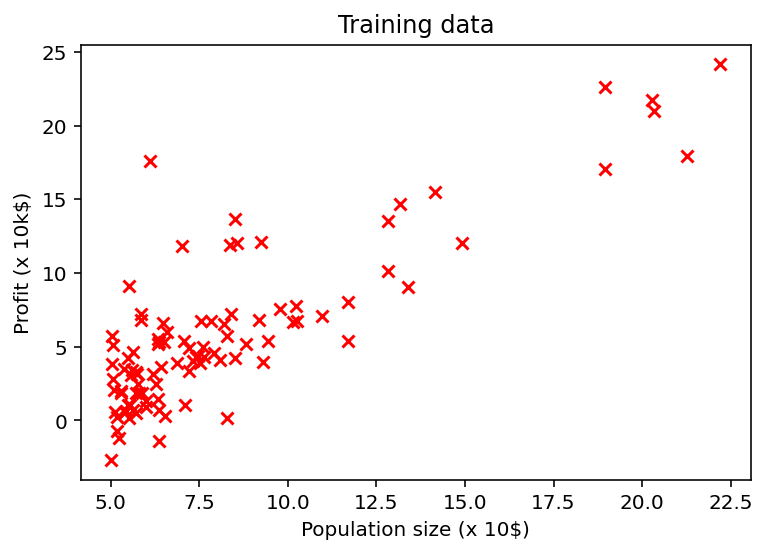

In [3]:
x_train = data[:,0]
y_train = data[:,1]

fig_1 = plt.figure(1)
plt.title("Training data")
plt.xlabel("Population size (x 10$)")
plt.ylabel("Profit (x 10k$)")
plt.scatter(x_train, y_train, c="r", marker="x")
plt.show()
fig_1.savefig('training data.png')

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [4]:
# construct data matrix
x0 = np.ones((x_train.reshape(-1,1).shape[0],1))
X = np.hstack((x0, x_train.reshape(-1,1)))

# parameters vector
w = np.ones(2)

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X, w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)

## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [5]:
# loss function definition
def loss_mse(y_pred,y): 

    loss = np.dot((y_pred - y).T, (y_pred - y)) / len(y)
    
    return loss


# Test loss function 
y = y_train # label 
y_pred = f_pred(X,w) # prediction

loss = loss_mse(y_pred,y)

## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [6]:
# gradient function definition
def grad_loss(y_pred,y,X):
  grad = 2 * np.dot(X.T, (y_pred - y)) / len(y)
  return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)

## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.0007340908050537109
12.377896677532537
[0.4235013 0.7596308]


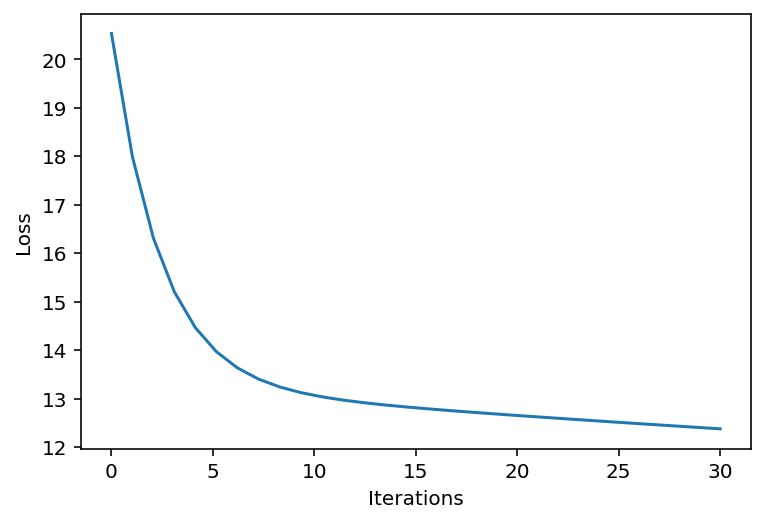

In [8]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.ones(max_iter) # record the loss values
    w_iters = np.ones((max_iter, 2)) # record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w) # linear predicition function
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss
        w = w - (tau * grad_f) # update rule of gradient descent    
        L_iters[i] = loss_mse(y_pred,y) # save the current loss value
        w_iters[i,:] = w # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.ones(2)
tau = 0.011
max_iter = 30

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1]) # plot the last value of the loss
print(w_iters[-1,:]) # plot the last value of the parameter w 


# plot
fig_2 = plt.figure(2)
plt.plot(np.linspace(0, max_iter, max_iter), L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
fig_2.savefig('loss value.png')

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

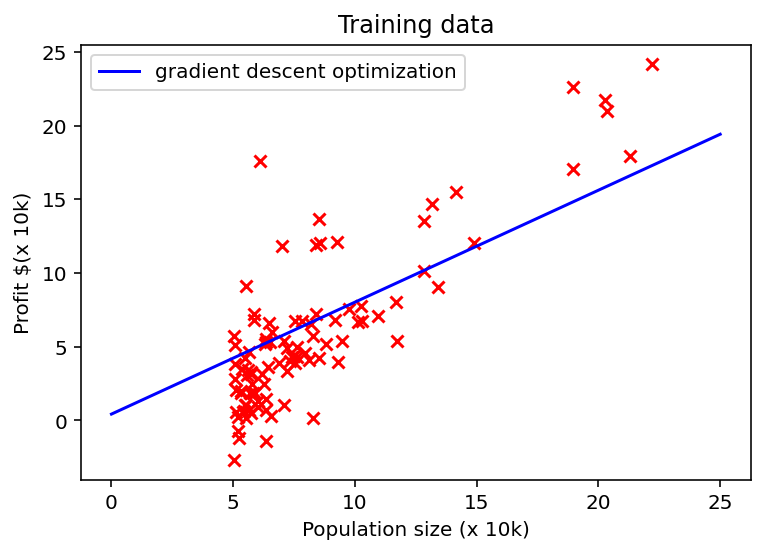

In [9]:
# linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
y_pred = w_iters[-1,0] + w_iters[-1,1] * x_pred # compute the prediction values within the given domain x_pred

# plot
fig_3 = plt.figure(3)
plt.scatter(x_train, y_train, c="r", marker="x")
plt.plot(x_pred, y_pred, c='b', label = "gradient descent optimization")
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()
fig_3.savefig('gradient descent optimization.png')

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

Time= 0.025792837142944336
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= 8.953942751950358
loss gradient descent= 12.377896677532537


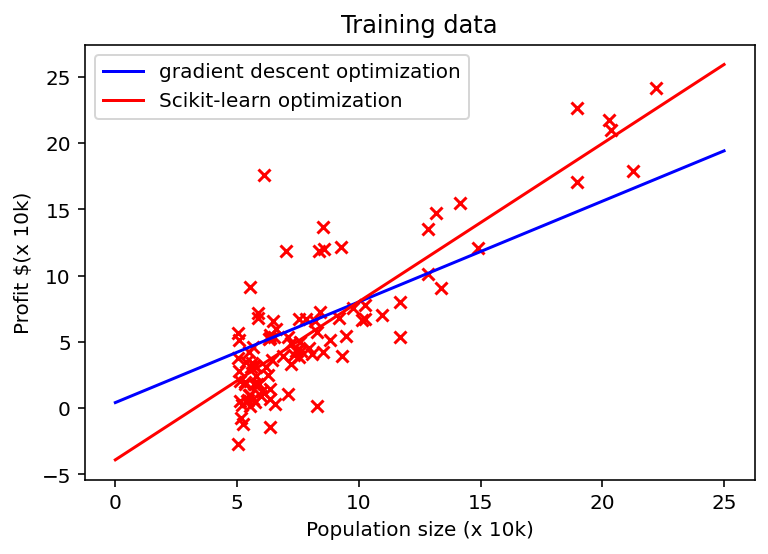

In [10]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train.reshape(-1,1), y_train) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_ # 절편
w_sklearn[1,0] = lin_reg_sklearn.coef_ # 기울기

print(w_sklearn)
y_pred_sklearn = lin_reg_sklearn.predict(x_train.reshape(-1,1)) # prediction obtained by the sklearn library
loss_sklearn = loss_mse(y_pred_sklearn, y_train) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


# plot
fig_4 = plt.figure(4)
y_pred_skl = w_sklearn[0,0] + w_sklearn[1,0] * x_pred # compute the prediction values within the given domain x_pred

plt.scatter(x_train.reshape(-1,1), y_train, c="r", marker="x")
plt.plot(x_pred, y_pred, c='b', label = "gradient descent optimization")
plt.plot(x_pred, y_pred_skl, c='r', label = "Scikit-learn optimization" )
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()
fig_4.savefig('scikit-learn optimization.png')

## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

In [11]:
# plot gradient descent 
def plot_gradient_descent(X,y,w_init,tau,max_iter):   
    def f_pred(X,w):
        f = np.dot(X, w)
        return f
    
    def loss_mse(y_pred,y):
        loss = np.dot((y_pred - y).T, (y_pred - y)) / len(y)
        return loss

    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):
        L_iters = np.ones(max_iter) # record the loss values
        w_iters = np.ones((max_iter, 2)) # record the parameter values
        w = w_init # initialization

        for i in range(max_iter): # loop over the iterations
            y_pred = f_pred(X,w) # linear predicition function
            grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
            w = w - (tau * grad_f) # update rule of gradient descent 
            L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
            w_iters[i,:] = w # save the current w value 

        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size)) 
  
    # Calculate loss values based on L(w0,w1)-values
    for (i,j),v in np.ndenumerate(Z):
      Z[i,j] = loss_mse(xx[i,j]+x_train*yy[i,j], y)

    # 3D visualization
    fig_5 = plt.figure(5)
    fig_6 = plt.figure(6)
    ax1 = fig_6.add_subplot()
    ax2 = fig_5.add_subplot(projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    ax1.scatter(w[0], w[1], c="r")
    ax1.plot(w_iters[:,0], w_iters[:,1])

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    
    for i in range(max_iter):
        w0 = w_iters[i,0]
        w1 = w_iters[i,1]
        Z2[i] = L_iters[i]
        
    ax2.plot(w_iters[:,0], w_iters[:,1], Z2)
    ax2.scatter(w[0], w[1], c="r")

    # settings common to both plots
    ax1.set_xlabel(r'$w_0$', fontsize=17)
    ax1.set_ylabel(r'$w_1$', fontsize=17)
    ax2.set_xlabel(r'$w_0$', fontsize=17)
    ax2.set_ylabel(r'$w_1$', fontsize=17)    
    
    return fig_5, fig_6

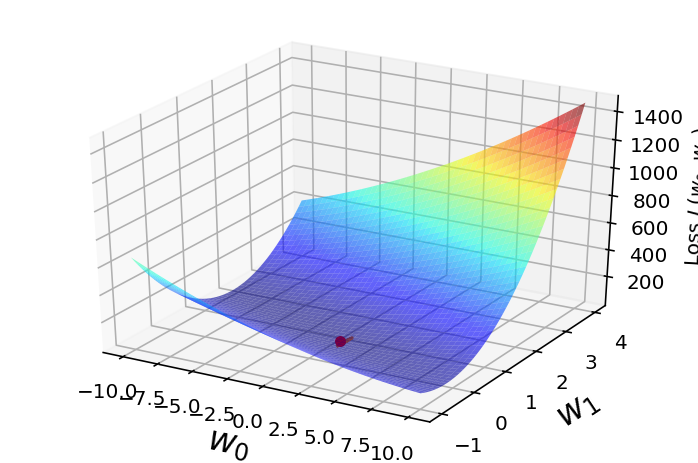

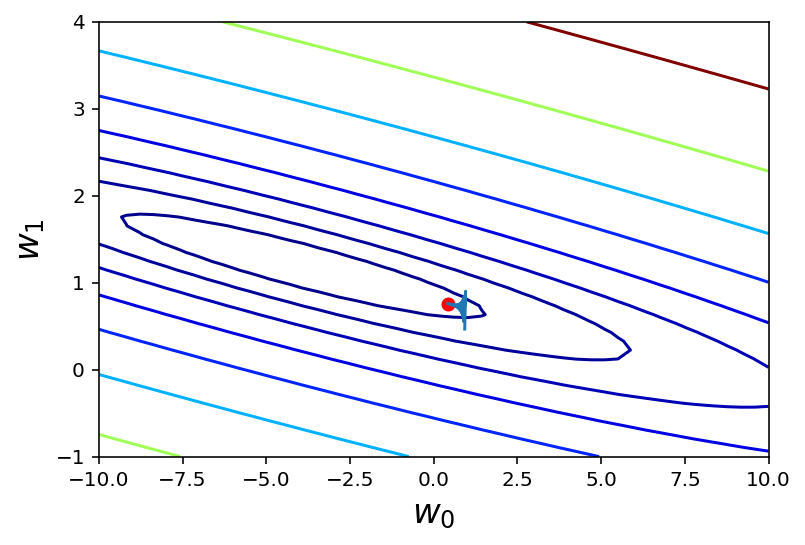

In [12]:
# run plot_gradient_descent function
w_init = np.ones(2)
tau = 0.011
max_iter = 30


fig_5, fig_6 = plot_gradient_descent(X,y,w_init,tau,max_iter)
fig_5.savefig('3D gradient.png')
fig_6.savefig('contour.png')

# Output results

## 1. Plot the training data (1pt)

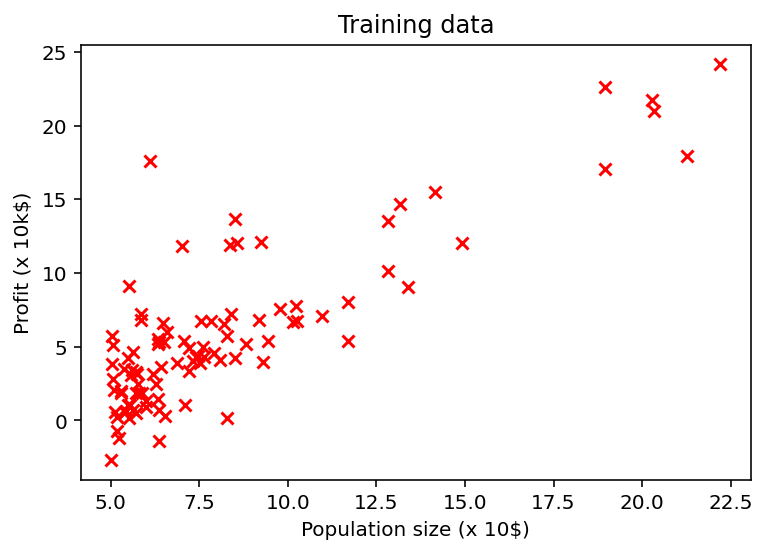

In [13]:
fig_1

## 2. Plot the loss curve in the course of gradient descent (2pt)

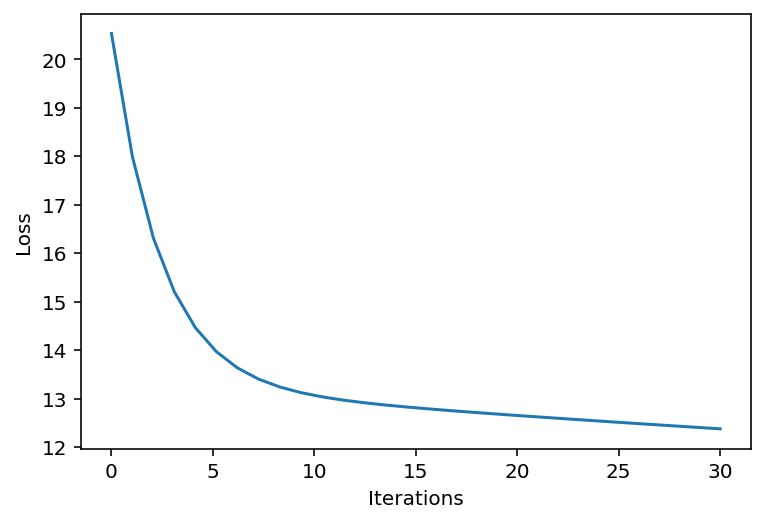

In [14]:
fig_2

## 3. Plot the prediction function superimposed on the training data (2pt)

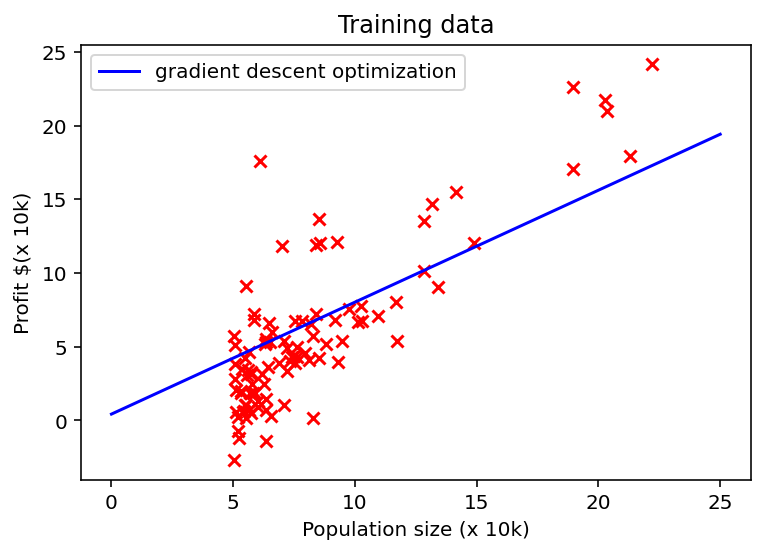

In [15]:
fig_3

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

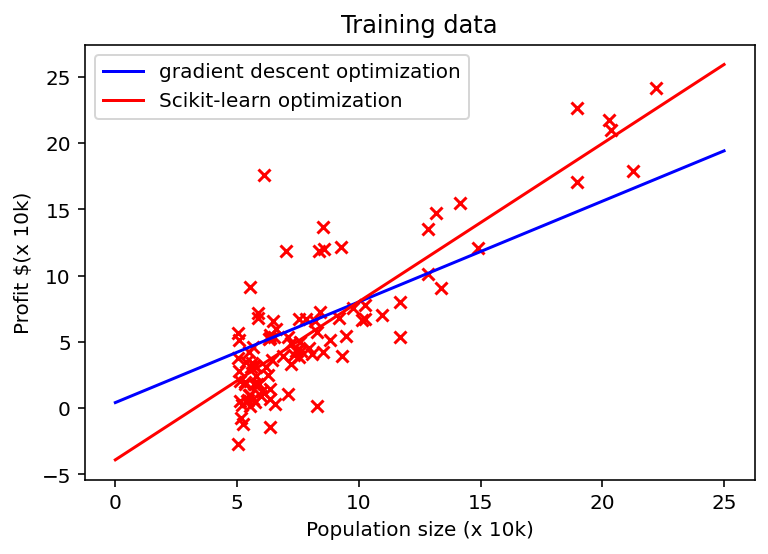

In [16]:
fig_4

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

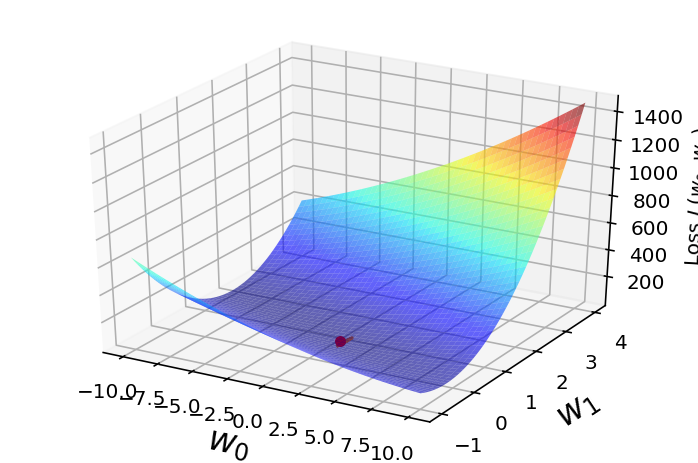

In [17]:
fig_5

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

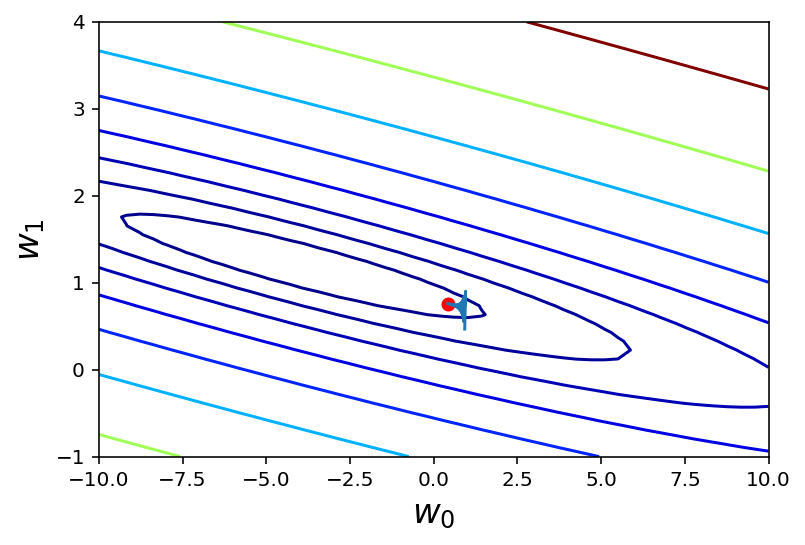

In [18]:
fig_6